In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
locations = ['Comments and\ndocumentation', 
             'Test inputs',
             'Class and\nvariable names',
             'Log, error, and\nassertion messages'
            ]

In [3]:
responses = [76,
             62,
             57,
             57
            ]

In [4]:
df = pd.DataFrame({'locations':locations, 'responses':responses})
df = df.sort_values('responses', ascending=True)

In [5]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

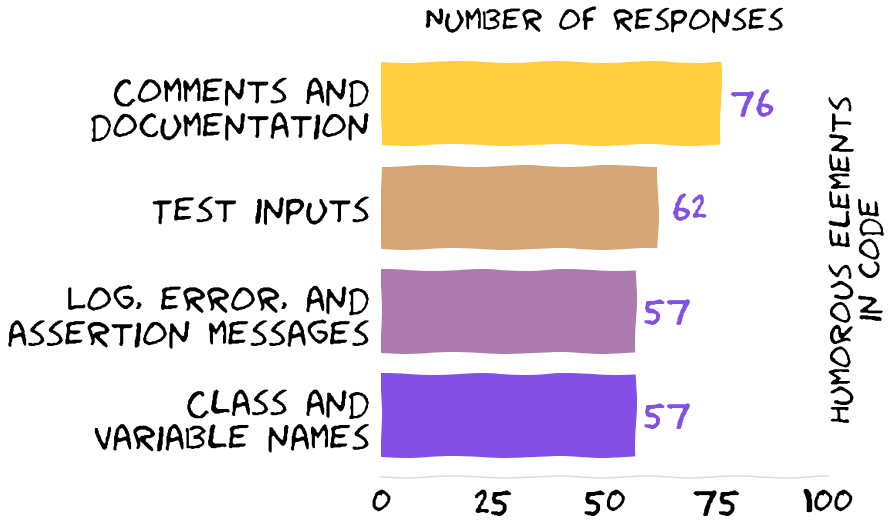

In [6]:
color1 = "#8250e5"
color2 = "#ffcf40"

# scale=2, length=105, randomness=3
with plt.xkcd(length=120, randomness=3):

    plt.rcParams.update({'font.size': 36})
    fig, ax = plt.subplots(figsize=(8, 8))

    # Save the chart so we can loop through the bars below.

    bars = ax.barh(
        y=df['locations'],
        width=df['responses'],
        color = get_color_gradient(color1, color2, 4)
    )

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax = plt.gca()
    ax.set_xlim([0, 100])
    ax.set_xticks([0, 25, 50, 75, 100])

    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()

    for p in ax.patches:
        width = p.get_width()
        plt.text(7 + p.get_width(),
                 p.get_y() + 0.5 * p.get_height(),
                 '{:1d}'.format(width),
                 color=bar_color,
                 weight='bold',
                 ha='center',
                 va='center')

    ax.xaxis.set_label_position("top")
    ax.yaxis.set_label_position("right")

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel('Number of responses', labelpad=15, color='#000', size=32)
    ax.set_ylabel('Humorous elements\nin code', labelpad=0, color='#000', size=32)

    plt.savefig("funny.pdf", bbox_inches='tight')